In [2]:
# reding dataset
with open("Next Word Predictor Dataset.txt", "r", encoding="utf-8") as file:
    text_data = file.readlines()

# first few lines
print(text_data[:5])


['I hope this email finds you well\n', 'Thank you for your prompt response\n', 'I appreciate your valuable input on this matter\n', 'Please find attached the document you requested\n', 'I am writing to inform you about the upcoming event\n']


In [4]:
import nltk
import spacy

# Download  punkt 
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Tokenization using NLTK
nltk_tokens = [nltk.word_tokenize(line) for line in text_data]

# Flatten the list of tokens
nltk_tokens_flat = [token for sublist in nltk_tokens for token in sublist]


In [6]:
# stopwords removing using NLTK
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in nltk_tokens_flat if token.lower() not in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Lemmatization using spaCy
nlp = spacy.load("en_core_web_sm")
lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(filtered_tokens))]

# Print tokens
print("Final Tokens:", lemmatized_tokens)

Final Tokens: ['hope', 'email', 'find', 'well', 'thank', 'prompt', 'response', 'appreciate', 'valuable', 'input', 'matter', 'please', 'find', 'attached', 'document', 'request', 'write', 'inform', 'upcoming', 'event', 'attention', 'detail', 'truly', 'commendable', 'want', 'follow', 'recent', 'conversation', 'pleasure', 'meeting', 'conference', 'reach', 'discuss', 'potential', 'collaboration', 'want', 'express', 'gratitude', 'support', 'let', 'us', 'schedule', 'meeting', 'go', 'project', 'detail', 'insight', 'instrumental', 'decision', '-', 'make', 'process', 'look', 'forward', 'hear', 'thought', 'proposal', 'please', 'let', 'know', 'require', 'clarification', 'Congratulations', 'recent', 'achievement', 'thrill', 'part', 'exciting', 'initiative', 'professionalism', 'truly', 'inspire', 'attached', 'report', 'contain', 'comprehensive', 'analysis', 'want', 'share', 'exciting', 'news', 'apologize', 'inconvenience', 'cause', 'feedback', 'crucial', 'continuous', 'improvement', 'please', 'advis

In [19]:
from gensim.models import Word2Vec

# Word2Vec model using CBOW
cbow_model = Word2Vec(sentences=[lemmatized_tokens], vector_size=100, window=5, min_count=1, sg=0)

# Word2Vec model using Skip-gram
skipgram_model = Word2Vec(sentences=[lemmatized_tokens], vector_size=100, window=5, min_count=1, sg=1)

# Embeddings of given word 'effective'
cbow_vector = cbow_model.wv['effective']  
skipgram_vector = skipgram_model.wv['effective']

print("CBOW Vector for 'effective':", cbow_vector)
print("Skip-gram Vector for 'effective':", skipgram_vector)


CBOW Vector for 'effective': [-0.00038211  0.17623831  0.06951694 -0.14705622  0.15410791 -0.19662252
  0.01107174  0.30561438 -0.07998713 -0.07581919 -0.1735885  -0.17769925
  0.01515169  0.20567682  0.02932743 -0.09161445 -0.26920542 -0.06982902
 -0.10093018 -0.28972608  0.08599763 -0.10220976 -0.04516526 -0.01521744
 -0.0391668   0.03097564  0.0460346  -0.3138322  -0.0546889   0.24429587
  0.08610934  0.0711196   0.03372522 -0.05429898 -0.12296774  0.23688968
  0.11847255  0.02710798  0.04845491 -0.35117435 -0.0663617  -0.03593362
  0.00740829 -0.0969058   0.17559193  0.04408919  0.07660418 -0.00542912
  0.20822705  0.24476588  0.16443084  0.09894574  0.08073536 -0.13712206
 -0.0623358   0.07821042 -0.03018282 -0.0982309  -0.27539057 -0.10222335
  0.1634625   0.05657671 -0.1959105  -0.03952359 -0.3074002   0.02767869
  0.12824252  0.04893636 -0.19876784  0.3010593  -0.0692261  -0.04652674
  0.06496357  0.15994018  0.09224211  0.11784366  0.01462691  0.14886709
 -0.02341668  0.139767

Cosine Similarity between CBOW and Skip-gram for 'example': 0.9211812


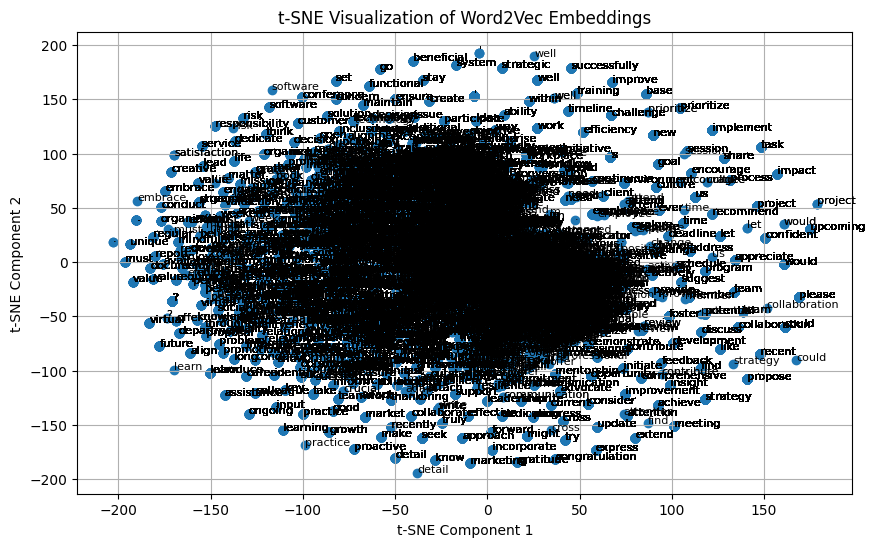

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# cosine similarity between the CBOW and Skip-gram
similarity = cosine_similarity(cbow_vector.reshape(1, -1), skipgram_vector.reshape(1, -1))
print("Cosine Similarity between CBOW and Skip-gram for 'example':", similarity[0][0])

# data for t-SNE visualization
all_vectors = np.array([cbow_model.wv[word] for word in lemmatized_tokens])
tsne = TSNE(n_components=2, random_state=0, perplexity=min(30, len(all_vectors)-1))  # Adjust perplexity
tsne_results = tsne.fit_transform(all_vectors)


# Visualize the t-SNE 
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], marker='o')

# points with words
for i, word in enumerate(lemmatized_tokens):
    plt.annotate(word, xy=(tsne_results[i, 0], tsne_results[i, 1]), fontsize=8)

plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()
